In [1]:
!pip install earthpy

In [2]:
!pip install rasterio

In [3]:
import rasterio as rio
import numpy
import earthpy.plot as ep
from rasterio.plot import show
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import colors
from sklearn.preprocessing import minmax_scale
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/My Drive/AlgaeBloom

/content/drive/My Drive/AlgaeBloom


In [6]:
all_sentinel_bands = glob(
    "upvanlake/*B*.jp2")

all_sentinel_bands.sort()
all_sentinel_bands

['upvanlake/T43QBB_20200412T053639_B01.jp2',
 'upvanlake/T43QBB_20200412T053639_B02.jp2',
 'upvanlake/T43QBB_20200412T053639_B03.jp2',
 'upvanlake/T43QBB_20200412T053639_B04.jp2',
 'upvanlake/T43QBB_20200412T053639_B05.jp2',
 'upvanlake/T43QBB_20200412T053639_B06.jp2',
 'upvanlake/T43QBB_20200412T053639_B07.jp2',
 'upvanlake/T43QBB_20200412T053639_B08.jp2',
 'upvanlake/T43QBB_20200412T053639_B09.jp2',
 'upvanlake/T43QBB_20200412T053639_B10.jp2',
 'upvanlake/T43QBB_20200412T053639_B11.jp2',
 'upvanlake/T43QBB_20200412T053639_B12.jp2',
 'upvanlake/T43QBB_20200412T053639_B8A.jp2',
 'upvanlake/T43QBB_20200412T053639_TCI.jp2']

In [7]:
# run once, only to generate the RGB composite image.
b4 = rio.open(all_sentinel_bands[3])
b3 = rio.open(all_sentinel_bands[2])
b2 = rio.open(all_sentinel_bands[1])


# Create an RGB image 
with rio.open('lake/RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b4.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b2.read(1),3) 
    rgb.close()

In [8]:
#get the shape of RGB image created
with rio.open('lake/RGB.tiff') as rgb_f:
  data = rgb_f.read()

data.shape

(3, 10980, 10980)

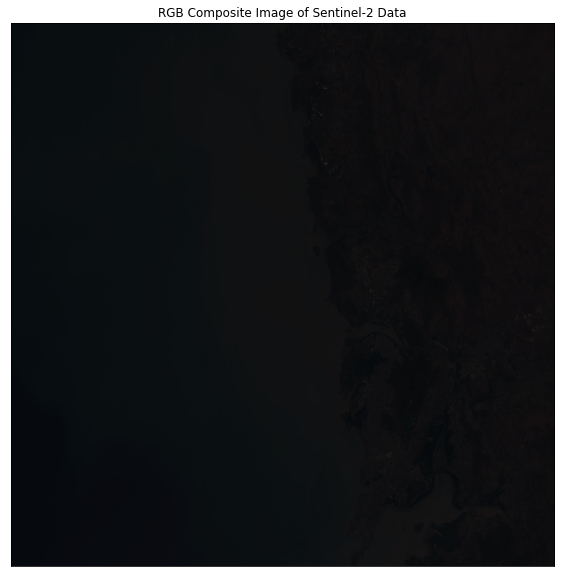

In [9]:
#plot rgb
ep.plot_rgb(data, rgb=(0,1,2), title='RGB Composite Image of Sentinel-2 Data')

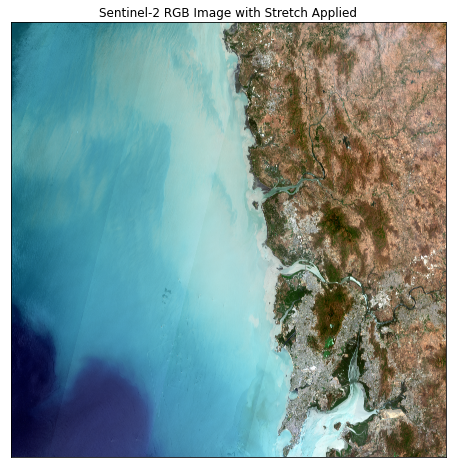

In [10]:
#rgb with stretch
ep.plot_rgb(
    data,
    rgb=(0,1,2),
    stretch=True,
    str_clip=0.5,
    figsize=(8,8),
    title="Sentinel-2 RGB Image with Stretch Applied",
)

plt.show()

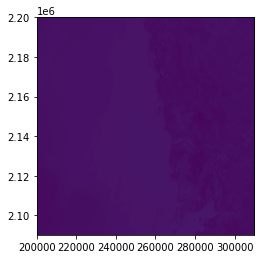

In [11]:
img2_458 = rio.open(all_sentinel_bands[1])
show(img2_458)

In [12]:
array458=img2_458.read()
array458.shape

(1, 10980, 10980)

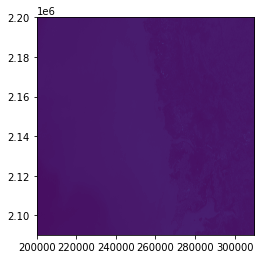

In [13]:
img3_529 = rio.open(all_sentinel_bands[2])
show(img3_529)

In [14]:
array529=img3_529.read()
array529.shape

(1, 10980, 10980)

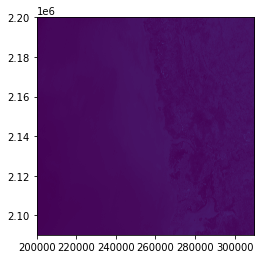

In [15]:
img4_644 = rio.open(all_sentinel_bands[3])
show(img4_644)

In [16]:
array644=img4_644.read()
array644.shape

(1, 10980, 10980)

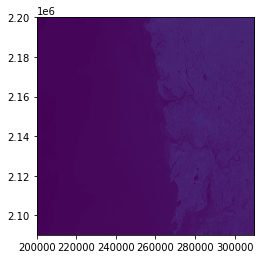

In [17]:
img8_857 = rio.open(all_sentinel_bands[7])
show(img8_857)

In [18]:
array857=img8_857.read()
array857.shape

(1, 10980, 10980)

In [19]:
chlorophylla=[(array857[i] - array644[i])/(array458[i] + array529[i]) for i in range(len(array857))]

In [20]:
cha=numpy.array(chlorophylla)

In [21]:
cha.shape

(1, 10980, 10980)

In [22]:
min=numpy.amin(cha)
min

0.0

In [23]:
max=numpy.amax(cha)
max

35.34789644012945

In [24]:
cha

array([[[27.60854846, 27.77266922, 27.59517766, ...,  0.42472885,
          0.43407797,  0.41574525],
        [27.43103448, 27.46568421, 27.37263953, ...,  0.38037343,
          0.43708609,  0.50312221],
        [27.54940878, 27.38581024, 27.57843552, ...,  0.3609087 ,
          0.36728528,  0.44533333],
        ...,
        [31.8218111 , 29.5608322 , 30.52427638, ...,  0.17314221,
          0.1671397 ,  0.18309038],
        [31.20954654, 30.48997669, 30.81565299, ...,  0.32238924,
          0.22279223,  0.30250348],
        [29.06571936, 30.09438306, 30.8715163 , ...,  0.44220261,
          0.27421438,  0.4261745 ]]])

In [25]:
cha_hl=[]

In [26]:
for i in range(1):
  for j in range(1):
    for k in range(7900,8500):
      cha_hl.append(cha[i][k][7800:8400])

In [27]:
cha_hl_arr=numpy.array(cha_hl)
cha_hl_arr

array([[0.22328767, 0.19683258, 0.15763547, ..., 0.58488121, 0.44154715,
        0.45576408],
       [0.23912068, 0.21114106, 0.17951002, ..., 0.70137962, 0.47877462,
        0.51892606],
       [0.22197607, 0.21187584, 0.19561325, ..., 0.83310088, 0.60226757,
        0.70528736],
       ...,
       [0.10933527, 0.19834385, 0.20856685, ..., 0.26039698, 0.2456057 ,
        0.22227488],
       [0.30638642, 0.33667921, 0.2563791 , ..., 0.2507109 , 0.21989529,
        0.22106262],
       [0.25812693, 0.25605399, 0.20221607, ..., 0.22798667, 0.19760766,
        0.21380952]])

In [28]:
for i in range(len(cha_hl_arr)):
  for j in range(len(cha_hl_arr[i])):
    cha_hl_arr[i][j]=((cha_hl_arr[i][j]-min)/(max-min))

In [29]:
cha_hl_arr

array([[0.00631686, 0.00556844, 0.00445954, ..., 0.01654642, 0.01249147,
        0.01289367],
       [0.00676478, 0.00597323, 0.00507838, ..., 0.01984219, 0.01354464,
        0.01468054],
       [0.00627975, 0.00599402, 0.00553394, ..., 0.02356861, 0.01703829,
        0.01995274],
       ...,
       [0.00309312, 0.00561119, 0.0059004 , ..., 0.00736669, 0.00694824,
        0.00628821],
       [0.00866774, 0.00952473, 0.00725302, ..., 0.00709267, 0.00622089,
        0.00625391],
       [0.00730247, 0.00724383, 0.00572074, ..., 0.00644979, 0.00559037,
        0.00604872]])

In [30]:
cha_hl_arr.shape

(600, 600)

In [31]:
harshalake=[cha_hl_arr]
harshalake=numpy.array(harshalake)
harshalake

array([[[0.00631686, 0.00556844, 0.00445954, ..., 0.01654642,
         0.01249147, 0.01289367],
        [0.00676478, 0.00597323, 0.00507838, ..., 0.01984219,
         0.01354464, 0.01468054],
        [0.00627975, 0.00599402, 0.00553394, ..., 0.02356861,
         0.01703829, 0.01995274],
        ...,
        [0.00309312, 0.00561119, 0.0059004 , ..., 0.00736669,
         0.00694824, 0.00628821],
        [0.00866774, 0.00952473, 0.00725302, ..., 0.00709267,
         0.00622089, 0.00625391],
        [0.00730247, 0.00724383, 0.00572074, ..., 0.00644979,
         0.00559037, 0.00604872]]])

In [32]:
def show_band(img, title='', size=(6,6), cmap='viridis'):
  print(title+' Shape: ', img.shape)
  fig = plt.figure(figsize=size)
  plt.imshow(img.reshape(img.shape[1], img.shape[2]), cmap= cmap)
  plt.axis('off')
  plt.colorbar()
  plt.title(title)
  plt.show()


In [33]:
numpy.amin(harshalake)

0.0

In [34]:
numpy.amax(harshalake)

0.9226218797284501

Chlorophyll Values Shape:  (1, 600, 600)


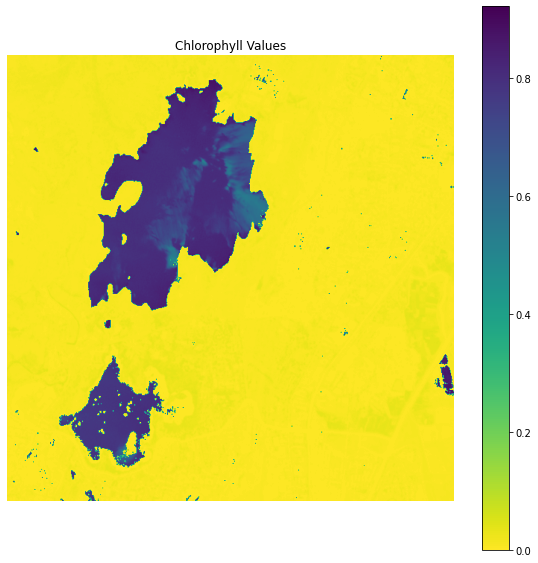

In [35]:
show_band(harshalake, title='Chlorophyll Values', size=(10,10), cmap="viridis_r")

In [36]:
# Define bins that you want, and then classify the data
dnbr_class_bins = [0, 0.3, 0.6, 0.7, 0.8, 1]
dnbr_sentinel_class = np.digitize(harshalake, dnbr_class_bins)

print(np.unique(dnbr_sentinel_class))

[1 2 3 4 5]


In [37]:
dnbr_sentinel_class.shape

(1, 600, 600)

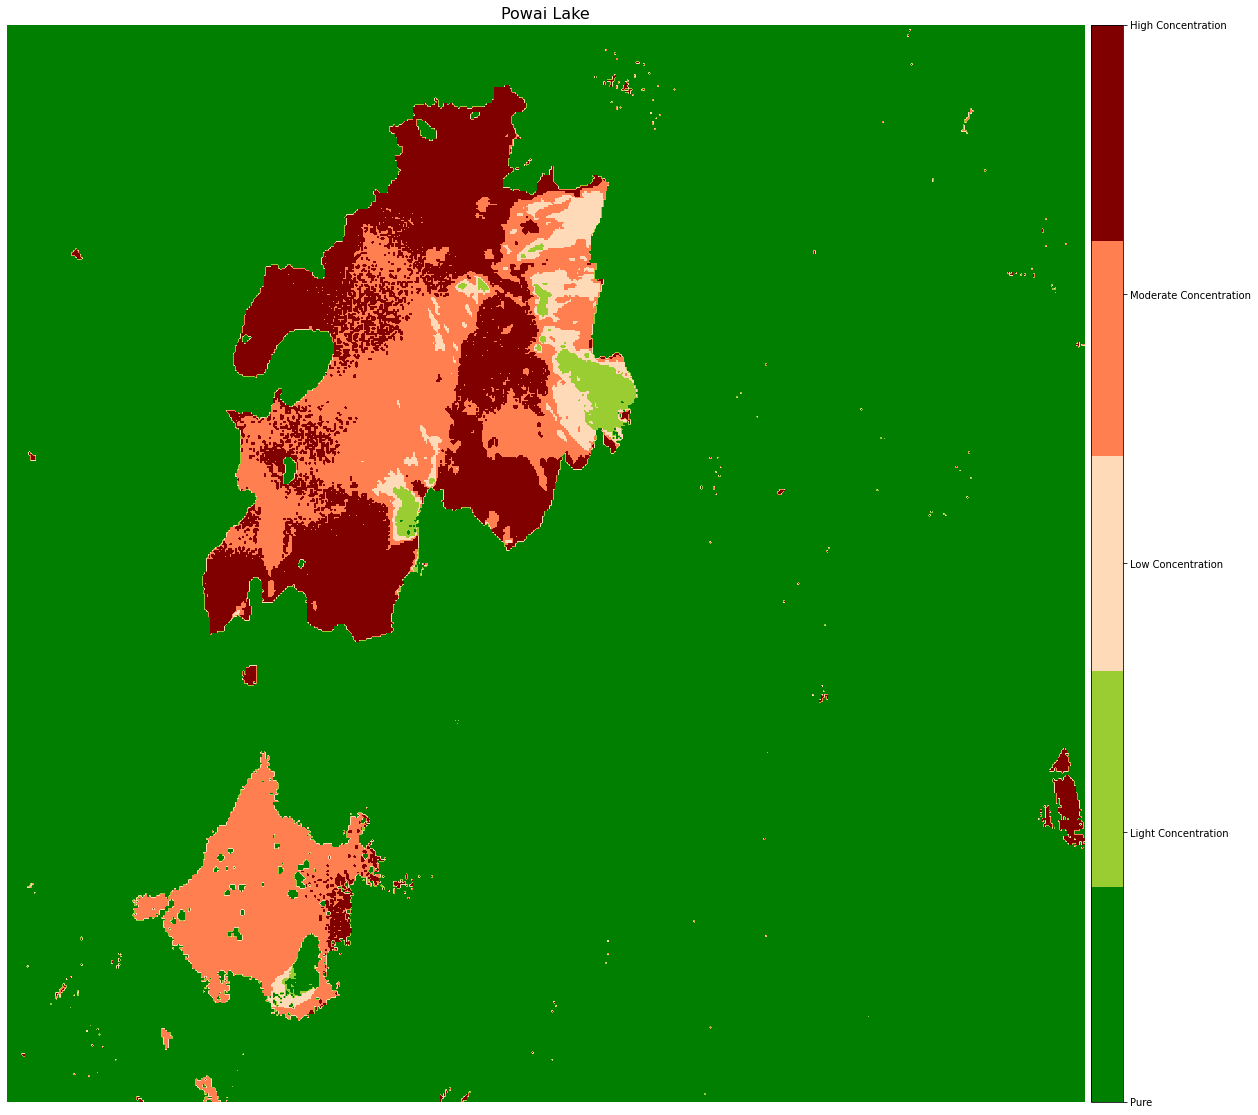

In [39]:
dnbr_cat_names = ["Pure",
                  "Light Concentration",
                  "Low Concentration",
                  "Moderate Concentration",
                  "High Concentration"]

nbr_colors = ["g", "yellowgreen", "peachpuff", "coral", "maroon"]

nbr_cmap = ListedColormap(nbr_colors)

# Plot the data with a custom legend
fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(dnbr_sentinel_class.reshape(dnbr_sentinel_class.shape[1:3]), cmap=nbr_cmap)

ax.set_title("Powai Lake",
             fontsize=16)

cbar = ep.colorbar(im)

cbar.set_ticks(np.unique(dnbr_sentinel_class))
cbar.set_ticklabels(dnbr_cat_names)

# Turn off ticks
ax.set_axis_off()
plt.show()